# Modeling

In this notebook we
1. Load '../Data/tweets_eda.pickle' which is the output of exploratory data analysis.
2. Apply VADER for sentiment analysis to generate labels.
3. Apply LSTM, CNN & TCN models to predict sentiment with labels generated by VADER, on both word-level texts and character-level texts.
4. Inpect results and tune model(s) further.
5. Compare models & come to the conclusion.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_pickle('../Data/tweets_eda.pickle')
df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 19 columns):
index                                                                       7628 non-null int64
Tweets                                                                      7628 non-null object
Has_predefined_movies                                                       7628 non-null object
Tweets_tokens                                                               7628 non-null object
Tweets_tokens_len                                                           7628 non-null int64
Tweets_tokens_remove_special_chars                                          7628 non-null object
Tweets_tokens_remove_special_chars_len                                      7628 non-null int64
Tweets_tokens_counter                                                       7628 non-null object
Tweets_tokens_counter_most_common                                           7628 non-null object
Tweets_tokens_remove_sp

There are 7628 data points.

### Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 24, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_line_plot(data):
    ax = get_sub_plot()
    sns.lineplot(data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()
    
def plot_dist_plot(data):
    ax = get_sub_plot()
    sns.distplot(data, ax = ax)
    plt.show()
    
def plot_point_plot(x, y, data):
    ax = get_sub_plot()
    sns.pointplot(x = x, y = y, data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()

### Predict Sentiment using VADER to Generate Lables for other Modeling Algorithms

We use VADER, a popular sentiment analysis package, 
http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
to get sentiment scores for each tweet.

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>


False

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['Tweets'].apply(sid.polarity_scores)
df['compound_sentiment_scores'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df.head(1)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


We retrieved compound sentiment score for each tweet & stored in 'compound_sentiment_scores' column. Note that the score is a floating number ranging from -1.0 to 1.0. -1.0 means negative while 1.0 means positive. 0 means neutral.

### Randomly Pick tweets and check their Sentiment Scores

In [7]:
import random

def random_pick_tweet_and_inspect(df, max_pct, max_num):
    n_data = df.shape[0]
    n_picked = n_data * max_pct
    if n_picked > max_num:
        n_picked = max_num
    random_sample = random.sample(range(0, n_data), n_picked)
    return df.loc[random_sample, :][['Tweets', 'compound_sentiment_scores']]

random_pick_tweet_and_inspect(df, 0.05, 20)    

,Tweets,compound_sentiment_scores
6281,WKND #BoxOffice:#MissionImpossibleFallout $61.5M#MammaMia2 $15M/$70.4M#Equalizer2 $14M/$64.2M#HotelTransylvania3 $12.3M/$119.2M#TeenTitansGOMovie $10.5M#AntManAndTheWasp $8.4M/$183.1M#Incredibles2 $7.2M/$572.8M#JurassicWorldFallenKingdom $6.8M/$397.6M,0.0000
6317,Sometimes an indoor theater just can't compare...#AntManAndTheWasp #Incredibles2 @Bengies,0.0000
1391,"The issue is not that #Oceans8 proved that all-female ensemble flicks can pull big #boxoffice, but why such flicks still face the pressure to prove the bankability of an entire gender each time out.",-0.4215
6475,#Incredibles2 director Brad Bird argues that animated movies are NOT kids movies.At least not explicitly kids movies.,-0.3818
6133,#Incredibles2 becomes first animated movie to cross $600 million mark in the states! …,0.0000
6240,"Bob and the kids have begun hero training, to make this generation of the Incredibles family the most incredible ever! DISNEY/PIXAR THE INCREDIBLES 2 #2 lands in comic shops today: #NCBD #incredibles2 @DisneyComics @Christosgage @LandryQWalker @Gurihiru",0.5983
1763,Write in Harry Shum Jr for #TheMaleTvStar #vote/cat17 … #ShadowHunters #Glee #CrazyRichAsians,0.0000
16,"Brad Bird has announced Auntie Edna, a short film on the Incredibles 2 Blu-Ray release!",0.0000
286,24 books you must read in 2018... #amreading #bookclub,0.0000
3813,So surreal to have the #poster I designed for #JurassicWorldFallenKingdom signed by the entire cast and director @filmbayona. Best experience in my career so far and hoping for more soon! Thank you to @colintrevorrow & @UniversalPics for the opportunity!-#jurassicworld,0.8916


Looking at the scores, VADER does a pretty good job.

### Plot Average / Minimum / Maximum Sentiment Scores for each Movie

In [8]:
# Collect average, min & max sentiment score for each movie.
df['Has_predefined_movies_strs'] = df['Has_predefined_movies'].apply(str)

df_avg_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['Has_predefined_movies', 'compound_sentiment_scores'].mean()).reset_index()
df_avg_movie_sentiment.columns = ['Has_predefined_movies_strs', 'ave_scores']
df_min_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].min()).reset_index()
df_min_movie_sentiment.columns = ['Has_predefined_movies_strs', 'min_scores']
df_max_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].max()).reset_index()
df_max_movie_sentiment.columns = ['Has_predefined_movies_strs', 'max_scores']

print(df_avg_movie_sentiment.head())
print(df_min_movie_sentiment.head())
print(df_max_movie_sentiment.head())

                       Has_predefined_movies_strs  ave_scores
0                                      ['adrift']    0.119587
1  ['americananimals', 'incredibles2', 'oceans8']    0.000000
2             ['americananimals', 'incredibles2']   -0.024033
3            ['americananimals', 'jurassicworld']   -0.307300
4                 ['americananimals', 'mammamia']    0.939700
                       Has_predefined_movies_strs  min_scores
0                                      ['adrift']     -0.7443
1  ['americananimals', 'incredibles2', 'oceans8']      0.0000
2             ['americananimals', 'incredibles2']     -0.3885
3            ['americananimals', 'jurassicworld']     -0.3073
4                 ['americananimals', 'mammamia']      0.9397
                       Has_predefined_movies_strs  max_scores
0                                      ['adrift']      0.9749
1  ['americananimals', 'incredibles2', 'oceans8']      0.0000
2             ['americananimals', 'incredibles2']      0.3164
3       

In [9]:
# Join the 3 dataFrame into one.
df_movie_sentiment = df_avg_movie_sentiment.merge(df_min_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')
df_movie_sentiment = df_movie_sentiment.merge(df_max_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')

# Keep rows where only one movie is present.
mask = df_movie_sentiment.Has_predefined_movies_strs.str.contains(',')
df_movie_sentiment = df_movie_sentiment.loc[~mask, :]
df_movie_sentiment['movie'] = df_movie_sentiment['Has_predefined_movies_strs'].apply(lambda x: x[2:-2])
df_movie_sentiment.head(20)

,Has_predefined_movies_strs,ave_scores,min_scores,max_scores,movie
0,['adrift'],0.119587,-0.7443,0.9749,adrift
6,['americananimals'],0.275057,-0.8748,0.9595,americananimals
13,['bookclub'],0.314703,-0.9735,0.9835,bookclub
21,['crazyrichasians'],0.389219,-0.9460,0.9900,crazyrichasians
23,['incredibles2'],0.265126,-0.9033,0.9775,incredibles2
26,['inthefade'],0.243986,-0.8979,0.9337,inthefade
31,['jurassicworld'],0.217215,-0.9451,0.9774,jurassicworld
37,['mammamia'],0.216199,-0.7543,0.9469,mammamia
45,['missionimpossible'],0.152282,-0.9136,0.9618,missionimpossible
46,['oceans8'],0.193227,-0.9446,0.9860,oceans8


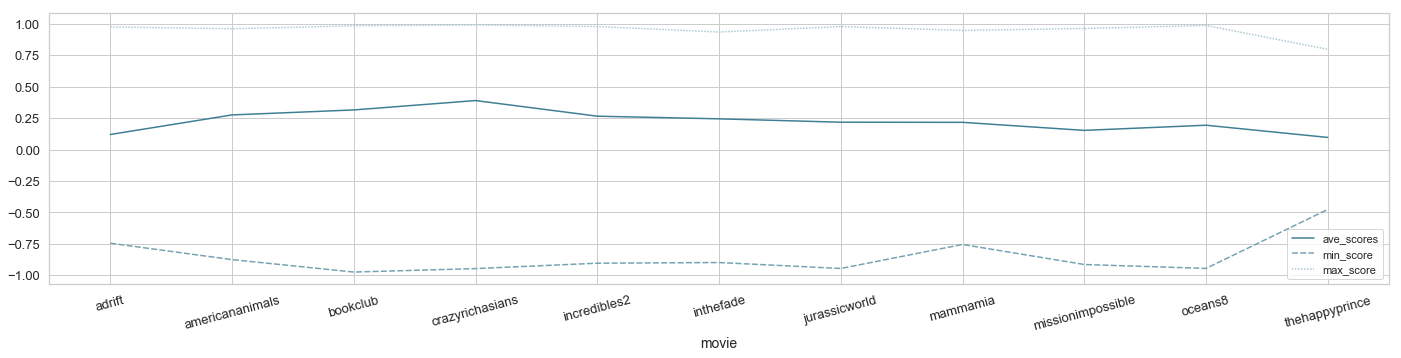

In [10]:
# Get dataframe for plotting scores for each movie.
index = df_movie_sentiment['movie']
data = []
for i, row in df_movie_sentiment.iterrows():
    data.append([row['ave_scores'], row['min_scores'], row['max_scores']])
df_movie_sentiment_plot = pd.DataFrame(data, index, ['ave_scores', 'min_score', 'max_score'])

plot_line_plot(df_movie_sentiment_plot)

Based on the above plot,
1. Crazy rich asians has the highest average sentiment score.
2. The Bookclub has the lowest minimum sentiment score.
3. Most of the movies has at least one pretty high score while crazy rich asians still has the highest maximum score.
4. Interestingly The Happy Prince has the lowest maximum score and highest minimum score.

### Most Frequent Words in Tweets

In [11]:
# TODO: wordcloud

### Top Positive, Neutral and Negative Words in Tweets

In [12]:
# TODO

### Top Words for each Movie

In [13]:
# TODO

Up until now we directly inspect & utilize sentiment socres from VADER. However as we want to classify the sentiment into 5 groups, negative, somewhat negative, neutral, somewhat positive & positive, let's see the histogram of scores and see if there's any intuitive way to group them.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


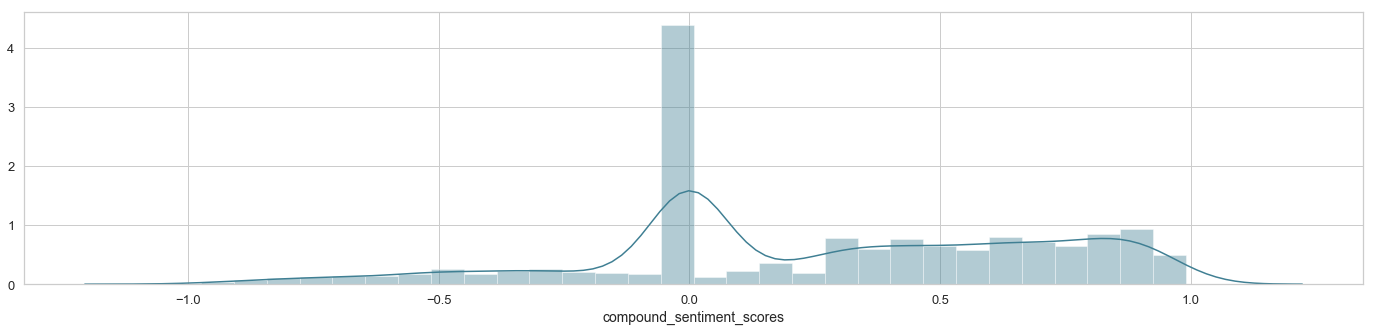

In [14]:
plot_dist_plot(df['compound_sentiment_scores'])

Looking at the above histogram, there are a lot of scores closed to 0, which apparently can be classified as 'neutral'.

Intuitively, we classify them into 5 groups using three threshold -0.5, 0 & 0.5. The groups are, negative, somewhat negative, neutral, somewhat positve & positive.

In [15]:
def apply_sentiment_class(x):
    if x == 0:
        return 'neutral'
    elif x > 0 and x <= 0.5:
        return 'somewhat positive'
    elif x > 0.5 and x <= 1:
        return 'positive'
    elif x < 0 and x >= -0.5:
        return 'somewhat negative'
    else:
        return 'negative'
    
df['semtiment_class'] = df['compound_sentiment_scores'].apply(apply_sentiment_class)

df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores,Has_predefined_movies_strs,semtiment_class
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,['oceans8'],neutral


The lables are now saved in 'semtiment_class' column.

With the label generated using VADER. We can use them to train our own models with supervised learning.

### Prepare functions for Preprocessing Features

As we would like to predict sentiment with tweets. Our features would be tweets and target would be sentiment labels we acquired using VADER.

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

max_fatures = 2000

# Let's tranform all tweets, the feature, to lower case first.
df['Tweets_lower'] = df['Tweets'].apply(lambda x: x.lower())

# and also encode sentiment class, our target
label_encoder = LabelEncoder()
df['semtiment_class_encoded'] = label_encoder.fit_transform(df['semtiment_class'])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# define feature & target
features = 'Tweets_lower'
target = 'semtiment_class_encoded'

In [18]:
def get_word_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_character_level_X(df, features):
    X = df[features].values
    X = char_arrs = [[c for c in x] for x in X]
    
    tokenizer = Tokenizer(char_level = True)
    tokenizer.fit_on_texts(char_arrs)
    
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_y(df, target):
    y = to_categorical(df[target])
    
    print('Shape of y: ', y.shape)
    
    return y

### Prepare functions for Scoring & Reporting

TODO: With labels generated by VADER, our problem has become a text classification problem and we report confusion matrix for each model.

In [19]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    

    confusion_matrix(y_test_decoded, y_pred)
    print()
    
    return (score, acc)

### Prepare functions for Modeling

#### We will first try the following models:
1. RNN / LSTM
2. CNN

#### Train-Test-Split
And use train_test_split to do train-test split.

TODO: Cross validation?

In [20]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Convolution1D, Flatten, Dropout

TextModes = ['WORD', 'CHAR']

Models = ['LSTM', 'CNN']

def model_lstm_cnn(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.2))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation = 'softmax'))
    
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes(data, features, target, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features, target = target)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

### Modeling

Let's first try both word-level and character-level on both RNN / LSTM & CNN.

In [21]:
scores, accs = try_all_modes(data = df, features = features, target = target, model_func = model_lstm_cnn)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 52, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 36s - loss: 1.3450 - acc: 0.4501
Epoch 2/10
 - 25s - loss: 1.0574 - acc: 0.5879
Epoch 3/10
 - 18s - loss: 0.8502 - acc: 0.6877
Epoch 4/10
 - 17s - loss: 0.7219 - acc: 0.7419
Epoch

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Epoch 1/10
 - 3s - loss: 1.3463 - acc: 0.4548
Epoch 2/10
 - 3s - loss: 0.9819 - acc: 0.6286
Epoch 3/10
 - 3s - loss: 0.7070 - acc: 0.7462
Epoch 4/10
 - 3s - loss: 0.4718 - acc: 0.8362
Epoch 5/10
 - 3s - loss: 0.3060 - acc: 0.9027
Epoch 6/10
 - 3s - loss: 0.1840 - acc: 0.9483
Epoch 7/10
 - 3s - loss: 0.1239 - acc: 0.9636
Epoch 8/10
 - 3s - loss: 0.0938 - acc: 0.9732
Epoch 9/10
 - 3s - loss: 0.0709 - acc: 0.9798
Epoch 10/10
 - 3s - loss: 0.0551 - acc: 0.9851
score: 2.39
acc: 0.58

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 338, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)         

In [22]:
def cmp_scores_and_accuracies(scores, accs):
    scoresDf = pd.DataFrame(list(scores.items()))
    scoresDf.columns = ['Modes', 'Score']
    accDf = pd.DataFrame(list(accs.items()))
    accDf.columns = ['Modes', 'Accuracy']
    
    print('Scores:')
    print(scoresDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Score', data = scoresDf)
    
    print('Accuracies:')
    print(accDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Accuracy', data = accDf)

Scores:
          Modes     Score
0  (WORD, LSTM)  1.263395
1   (WORD, CNN)  2.392768
2  (CHAR, LSTM)  1.324351
3   (CHAR, CNN)  2.272023


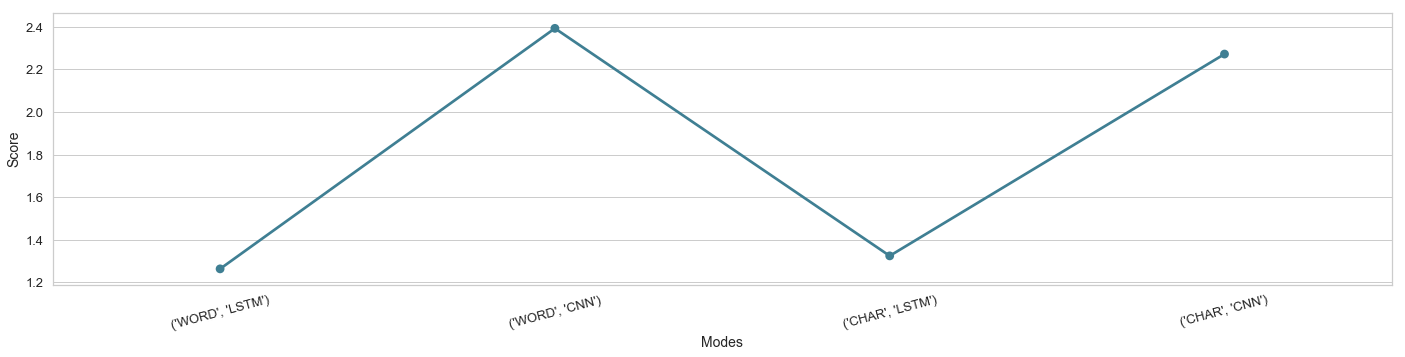

Accuracies:
          Modes  Accuracy
0  (WORD, LSTM)  0.645353
1   (WORD, CNN)  0.575457
2  (CHAR, LSTM)  0.466243
3   (CHAR, CNN)  0.406672


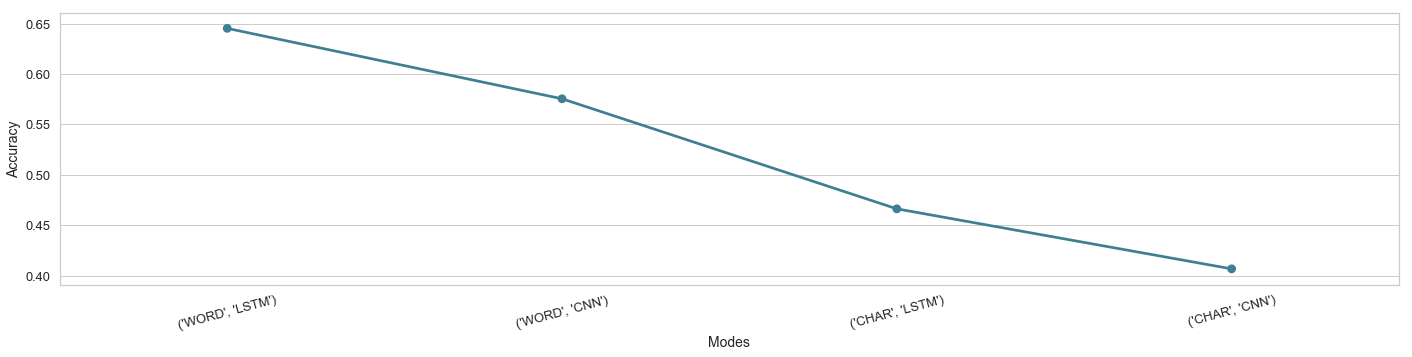

In [23]:
cmp_scores_and_accuracies(scores, accs)

According to the training process and scores/accuracy plots,
1. Word-level LSTM has best accuracy.
2. CNN runtime is a lot faster than LSTM for both word-level and charater-level modeling.

Howver if we compare number of parameters, take word-level modeling for example, LSTM has 254800 parameters while CNN has 24640 + 6176 + 1552 = 32368 parameters, which is only about 12.7% of number of parameters of LSTM model.

In addition, the drop out number is also different.

These might be why LSTM consistently has better accuracy.

Let's try to tune CNN to see if CNN can get better accuracy.

In [24]:
Models = ['CNN_MORE_DROPOUT', 'CNN_MORE_PARAM', 'CNN_MORE_DROPOUT_PARAM']

def model_tune_CNN(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'CNN_MORE_DROPOUT':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN_MORE_PARAM':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(128, 3, border_mode = 'same'))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.2))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN_MORE_DROPOUT_PARAM':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(128, 3, border_mode = 'same'))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation = 'softmax'))
        
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

In [25]:
scores_tune_cnn, accs_tune_cnn = try_all_modes(data = df, features = features, target = target, model_func = model_tune_CNN)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Text: WORD Model: CNN_MORE_DROPOUT
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 52, 64)            24640     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 52, 32)            6176      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 52, 16)            1552      
_________________________________________________________________
flatten_3 (Flatten)          (None, 832)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 832)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 180) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Text: WORD Model: CNN_MORE_PARAM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 52, 128)           49280     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 52, 64)            24640     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 52, 32)            6176      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 52, 16)            1552      
_________________________________________________________________
flatten_4 (Flatten)          (None, 832)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 832)   

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 52, 128)           49280     
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 52, 64)            24640     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 52, 32)            6176      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 52, 16)            1552      
_________________________________________________________________
flatten_5 (Flatten)          (None, 832)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 832)               0         
__________

Epoch 1/10
 - 27s - loss: 1.4304 - acc: 0.4151
Epoch 2/10
 - 23s - loss: 1.3282 - acc: 0.4579
Epoch 3/10
 - 22s - loss: 1.2452 - acc: 0.4924
Epoch 4/10
 - 24s - loss: 1.1693 - acc: 0.5258
Epoch 5/10
 - 24s - loss: 1.0930 - acc: 0.5644
Epoch 6/10
 - 25s - loss: 1.0529 - acc: 0.5781
Epoch 7/10
 - 22s - loss: 1.0379 - acc: 0.5922
Epoch 8/10
 - 23s - loss: 0.9995 - acc: 0.6039
Epoch 9/10
 - 23s - loss: 0.9943 - acc: 0.6106
Epoch 10/10
 - 24s - loss: 0.9906 - acc: 0.6051
score: 1.43
acc: 0.46



Let's compare these models again:

Scores:
                            Modes     Score
0                    (WORD, LSTM)  1.263395
1                     (WORD, CNN)  2.392768
2                    (CHAR, LSTM)  1.324351
3                     (CHAR, CNN)  2.272023
4        (WORD, CNN_MORE_DROPOUT)  1.887778
5          (WORD, CNN_MORE_PARAM)  2.456219
6  (WORD, CNN_MORE_DROPOUT_PARAM)  1.784245
7        (CHAR, CNN_MORE_DROPOUT)  1.582352
8          (CHAR, CNN_MORE_PARAM)  1.861623
9  (CHAR, CNN_MORE_DROPOUT_PARAM)  1.426915


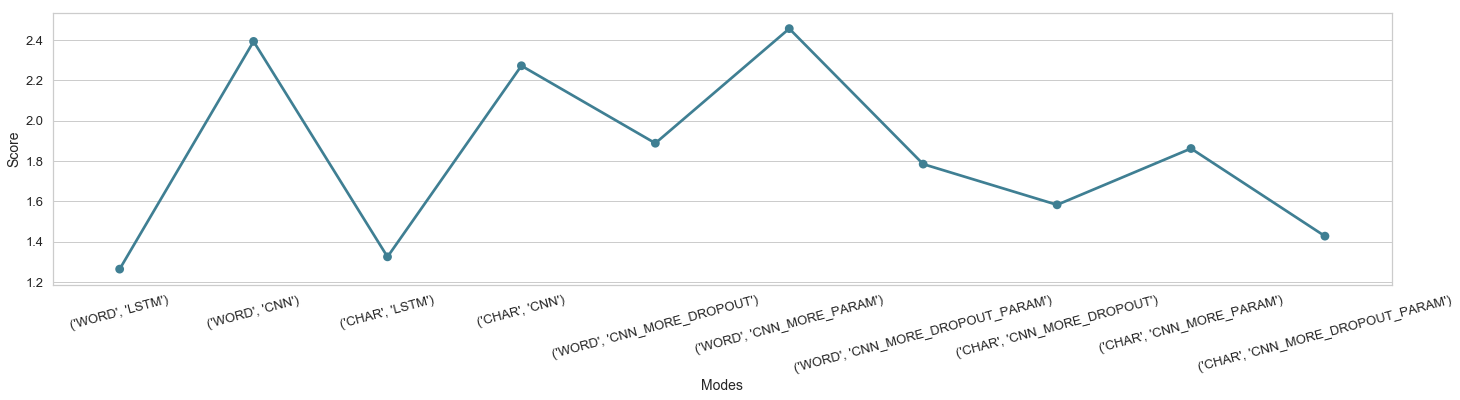

Accuracies:
                            Modes  Accuracy
0                    (WORD, LSTM)  0.645353
1                     (WORD, CNN)  0.575457
2                    (CHAR, LSTM)  0.466243
3                     (CHAR, CNN)  0.406672
4        (WORD, CNN_MORE_DROPOUT)  0.590945
5          (WORD, CNN_MORE_PARAM)  0.565528
6  (WORD, CNN_MORE_DROPOUT_PARAM)  0.591342
7        (CHAR, CNN_MORE_DROPOUT)  0.445592
8          (CHAR, CNN_MORE_PARAM)  0.416998
9  (CHAR, CNN_MORE_DROPOUT_PARAM)  0.456315


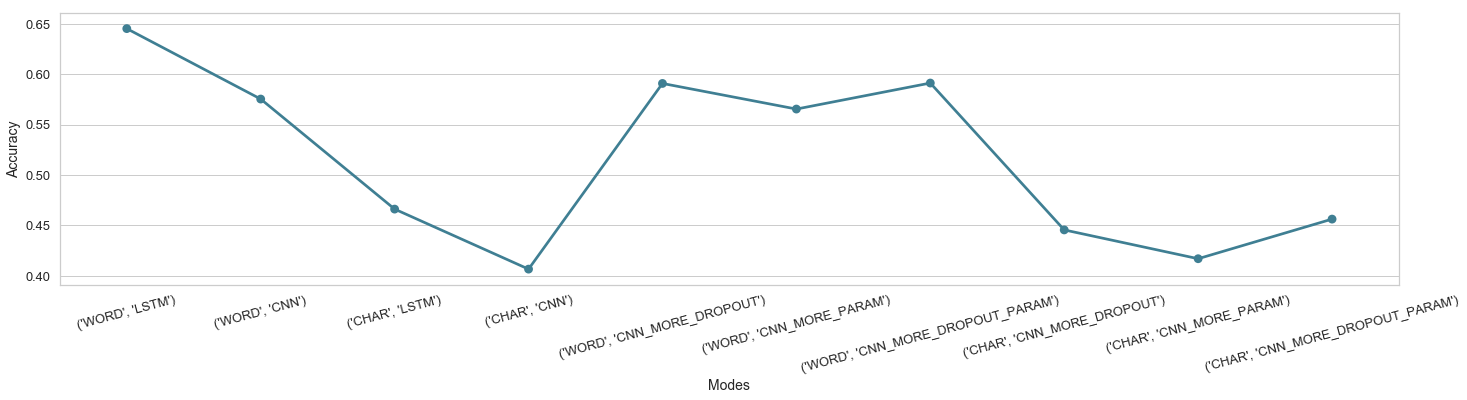

In [26]:
scores.update(scores_tune_cnn)
accs.update(accs_tune_cnn)

cmp_scores_and_accuracies(scores, accs)

For CNN, by increasing dropout rate from 0.2 to 0.4, accuracy is indeed improved.

Let's also inspecct some outliers where LSTM has better accuracy than CNN:

In [27]:
# TODO

#### We will also try TCN:

We also apply Temporal Convolutional Network (TCN) as TCN exhibits longer memory than recurrent architectures with the same capacity.

In [28]:
from keras.layers import Input
from keras.models import Model
from tcn import TCN

Models = ['TCN']

def model_TCN(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    batch_size = 32
    
    if model_mode == 'TCN':
        i = Input(shape = (X.shape[1], ))
        o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(5, activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
        
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    y_pred_prob = model.predict(X_test)    
    y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

In [29]:
scores_tcn, accs_tcn = try_all_modes(data = df, features = features, target = target, model_func = model_TCN)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 52)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 52, 128)      256000      input_1[0][0]                    
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, 52, 64)       8256        embedding_11[0][0]               
__________________________________________________________________________________________________
TCN_1_dilated_conv_1_tanh_s0 (C (None, 52, 64)       8256        TCN_1_initial_conv[0][0]         
________________________________________

Epoch 1/10
 - 45s - loss: 1.5598 - acc: 0.2935
Epoch 2/10
 - 36s - loss: 1.5028 - acc: 0.3205
Epoch 3/10
 - 36s - loss: 1.4786 - acc: 0.3213
Epoch 4/10
 - 35s - loss: 1.4660 - acc: 0.3329
Epoch 5/10
 - 34s - loss: 1.4593 - acc: 0.3411
Epoch 6/10
 - 35s - loss: 1.4550 - acc: 0.3440
Epoch 7/10
 - 40s - loss: 1.4547 - acc: 0.3481
Epoch 8/10
 - 38s - loss: 1.4346 - acc: 0.3804
Epoch 9/10
 - 35s - loss: 1.3367 - acc: 0.4765
Epoch 10/10
 - 34s - loss: 1.2072 - acc: 0.5362
score: 1.22
acc: 0.54

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 338)          0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 3

Epoch 1/10
 - 221s - loss: 1.5693 - acc: 0.2888
Epoch 2/10
 - 209s - loss: 1.5024 - acc: 0.3198
Epoch 3/10
 - 214s - loss: 1.4763 - acc: 0.3311
Epoch 4/10
 - 211s - loss: 1.4716 - acc: 0.3190
Epoch 5/10
 - 220s - loss: 1.4640 - acc: 0.3452
Epoch 6/10
 - 219s - loss: 1.4575 - acc: 0.3389
Epoch 7/10
 - 220s - loss: 1.4545 - acc: 0.3407
Epoch 8/10
 - 229s - loss: 1.4549 - acc: 0.3403
Epoch 9/10
 - 238s - loss: 1.4488 - acc: 0.3460
Epoch 10/10
 - 222s - loss: 1.4517 - acc: 0.3462
score: 1.44
acc: 0.35



Scores:
                             Modes     Score
0                     (WORD, LSTM)  1.263395
1                      (WORD, CNN)  2.392768
2                     (CHAR, LSTM)  1.324351
3                      (CHAR, CNN)  2.272023
4         (WORD, CNN_MORE_DROPOUT)  1.887778
5           (WORD, CNN_MORE_PARAM)  2.456219
6   (WORD, CNN_MORE_DROPOUT_PARAM)  1.784245
7         (CHAR, CNN_MORE_DROPOUT)  1.582352
8           (CHAR, CNN_MORE_PARAM)  1.861623
9   (CHAR, CNN_MORE_DROPOUT_PARAM)  1.426915
10                     (WORD, TCN)  1.217578
11                     (CHAR, TCN)  1.438308


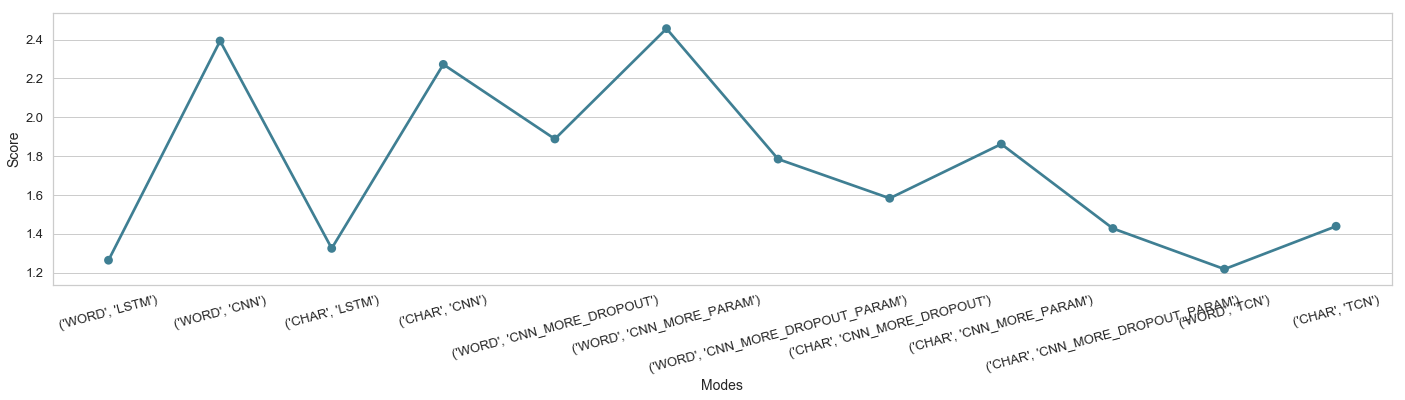

Accuracies:
                             Modes  Accuracy
0                     (WORD, LSTM)  0.645353
1                      (WORD, CNN)  0.575457
2                     (CHAR, LSTM)  0.466243
3                      (CHAR, CNN)  0.406672
4         (WORD, CNN_MORE_DROPOUT)  0.590945
5           (WORD, CNN_MORE_PARAM)  0.565528
6   (WORD, CNN_MORE_DROPOUT_PARAM)  0.591342
7         (CHAR, CNN_MORE_DROPOUT)  0.445592
8           (CHAR, CNN_MORE_PARAM)  0.416998
9   (CHAR, CNN_MORE_DROPOUT_PARAM)  0.456315
10                     (WORD, TCN)  0.542097
11                     (CHAR, TCN)  0.347498


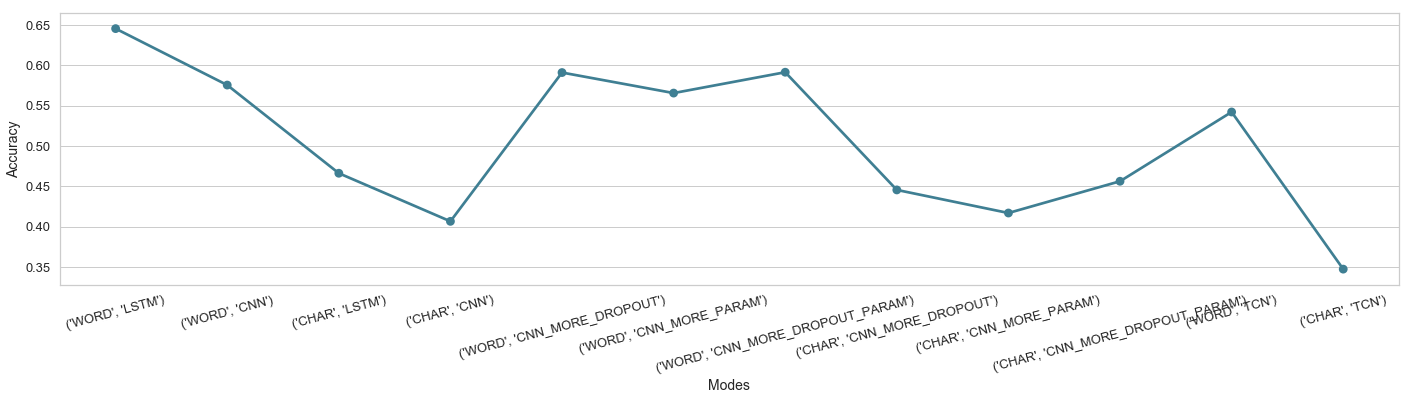

In [30]:
scores.update(scores_tcn)
accs.update(accs_tcn)

cmp_scores_and_accuracies(scores, accs)

Based on the above plot, we can achieve similar accuracy with TCN as compared to LSTM.

#### Let's also try mLSTM:
Reference: https://github.com/titu1994/Keras-Multiplicative-LSTM

In [31]:
# TODO

### Conclusion
TODO.

### Next Steps
1. When acquiring labels with VADER, we can try to apply other strategies instead of using hard-coded threshold.
2. Apply dimmensionality reduction on texts to see if results are better.
3. Apply pre-trained model for embedding.
4. Include emojis and other special characters for mLSTM.